# Data Source:
[Kaggle](https://www.kaggle.com/cityofoakland/oakland-crime-statistics-2011-to-2016)

# Goal: Play with 2011 data, then create script for Master Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
df11 = pd.read_csv('records-for-2011.csv')

In [6]:
df11.head(3)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
0,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
1,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000


In [11]:
df11['DATE'] = pd.to_datetime(df11['Create Time'],dayfirst=True)

In [14]:
df11['DATE'] = df11['DATE'].dt.date

In [15]:
df11.set_index('DATE',inplace=True)

In [27]:
df11.index = pd.to_datetime(df11.index,dayfirst=True)

In [28]:
# Changed Index to DateTime
df11.head(4)

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
DATE,,,,,,,,,,
2011-01-01,OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
2011-01-01,OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
2011-01-01,OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
2011-01-01,OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000


In [30]:
df11['Count'] = 1

In [35]:
dfTS11 = df11[['Count']].resample(rule='D').sum()

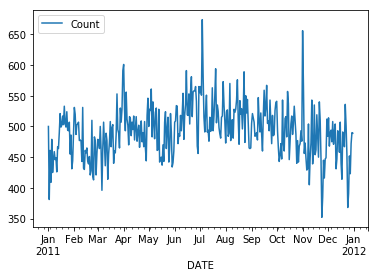

In [37]:
# Beautiful. It looks like something that would work with time series analysis
dfTS11.plot()

# Aggregating all data

In [2]:
def Master():
    setOf = ['records-for-2011.csv','records-for-2012.csv','records-for-2013.csv',
             'records-for-2014.csv','records-for-2015.csv','records-for-2016.csv']
    
    for x in range(len(setOf)):
        temp = pd.read_csv(setOf[x])
        temp['DATE'] = pd.to_datetime(temp['Create Time'],dayfirst=True)
        temp['DATE'] = temp['DATE'].dt.date
        temp.set_index('DATE',inplace=True)
        temp.index = pd.to_datetime(temp.index,dayfirst=True)
        temp['Count'] = 1
        temp = temp[['Count']].resample(rule='D').sum()
        # temp.plot(title=setOf[x],figsize=(15,5))
        if (x == 0):
            Master = temp
        Master = pd.concat([Master,temp])
    return Master

In [3]:
df = Master()

Text(0, 0.5, 'Number of Crimes per Day')

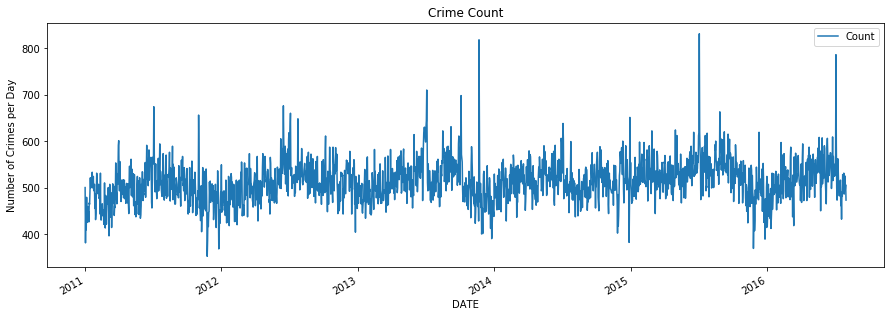

In [4]:
df.plot(figsize=(15,5))
plt.title('Crime Count')
plt.ylabel('Number of Crimes per Day')

In [5]:
df.to_csv('records-MASTER.csv')